## Contexto

The dataset includes 244 instances that regroup a data of two regions of Algeria (Bejaia region and Sidi Bel-abbes region) (122 instances for each region).

The observed period is from June 2012 to September 2012.

The dataset includes attributes and the 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes, depending on the Fire Weather Index.

This dataset can be used for both regression model (using Fire Weather Index as target) or classification model (using Clases as target)

# Regression Model

## Configurações

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## Import and Clean data

**Import**

In [4]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
df.shape

(246, 14)

**Clean**

In [6]:
df[df.isnull().any(axis=1)] #só devolve onde há alguma linha missing

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
#Arruma a base, marcando região 0 e remove linhas 122 e 123 que não são observações
df.loc[:121,'Region'] = 0
df.loc[124:,'Region'] = 1

In [8]:
df.loc[121:124,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [9]:
df = df[df['Region'].isin([0,1])]

In [10]:
#checa demais missing novamente
df[df.isnull().any(axis=1)] #só devolve onde há alguma linha missing

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [11]:
#remove linha com erro de formatação
df2 = df.drop(167,axis=0).reset_index()

In [12]:
#checa demais missing novamente
df2[df2.isnull().any(axis=1)] #ok

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


**Arruma columns names**

In [13]:
df2.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df2.columns = df2.columns.str.strip() #para tirar só espaços em branco
df2 = df2.rename({'Classes':'class_fire'},axis=1)

In [15]:
df2.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'class_fire', 'Region'],
      dtype='object')

**Ajusta datatypes**

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    object 
 2   month        243 non-null    object 
 3   year         243 non-null    object 
 4   Temperature  243 non-null    object 
 5   RH           243 non-null    object 
 6   Ws           243 non-null    object 
 7   Rain         243 non-null    object 
 8   FFMC         243 non-null    object 
 9   DMC          243 non-null    object 
 10  DC           243 non-null    object 
 11  ISI          243 non-null    object 
 12  BUI          243 non-null    object 
 13  FWI          243 non-null    object 
 14  class_fire   243 non-null    object 
 15  Region       243 non-null    float64
dtypes: float64(1), int64(1), object(14)
memory usage: 30.5+ KB


In [17]:
df2[['day','month','year','Temperature','RH','Ws','Region']] = df2[['day','month','year','Temperature','RH','Ws','Region']].astype(int)

In [18]:
features_object = [features for features in df2.columns if df2[features].dtypes == 'O']
features_object

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'class_fire']

In [19]:
for i in features_object:
    if i != 'class_fire':
      df2[i] = df2[i].astype(float)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  class_fire   243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


## Público

- Nível do modelo: região
- Datas de observação: june.12 to september.12


**Checar duplicidade**

In [21]:
check_dup = df2.groupby(['day','month','year','Region'])['class_fire'].count().reset_index()
check_dup[check_dup['class_fire']>1] # ok

,day,month,year,Region,class_fire


**Análise descritiva**

In [22]:
#df2.groupby('Region')['class_fire'].count().reset_index()
print(df2['Region'].value_counts())
print(df2['Region'].value_counts(normalize=1))

Region
0    122
1    121
Name: count, dtype: int64
Region
0    0.502058
1    0.497942
Name: proportion, dtype: float64


## Variável resposta

- Fire Weather Index

In [23]:
df2[['FWI']].describe()

,FWI
count,243.000000
mean,7.035391
std,7.440568
min,0.000000
25%,0.700000
50%,4.200000
75%,11.450000
max,31.100000


Text(1.5, 0.5, 'O índice varia de 0 a 31, com média 7 e mediana 4.2')

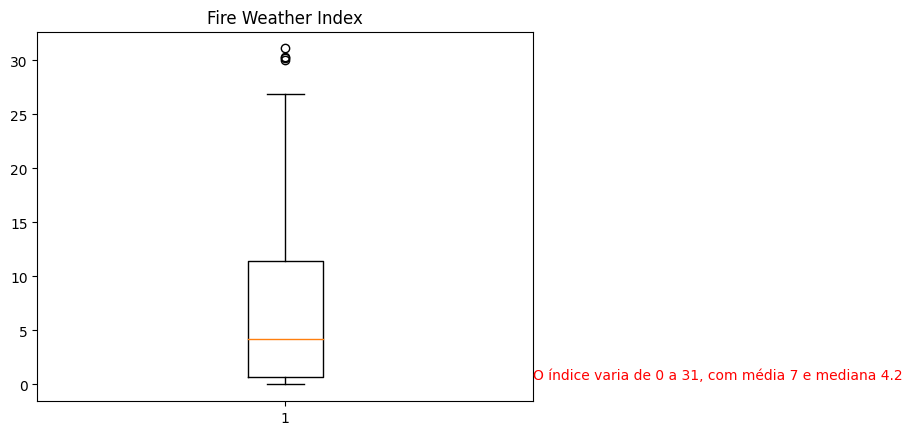

In [24]:
plt.boxplot(df2['FWI'])
plt.title('Fire Weather Index')
plt.annotate('O índice varia de 0 a 31, com média 7 e mediana 4.2',
            xy=(0.5,0.5), #comentário sobre este ponto (qualquer um, só para aparecer a caixa)
            xytext=(1.5, 0.5), #posição do texto
            fontsize=10,
             color='red')

In [25]:
df2.groupby('Region')['FWI'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
0,122.0,5.577869,6.343051,0.0,0.5,3.0,8.7,30.2
1,121.0,8.504959,8.169444,0.0,0.9,6.0,13.7,31.1


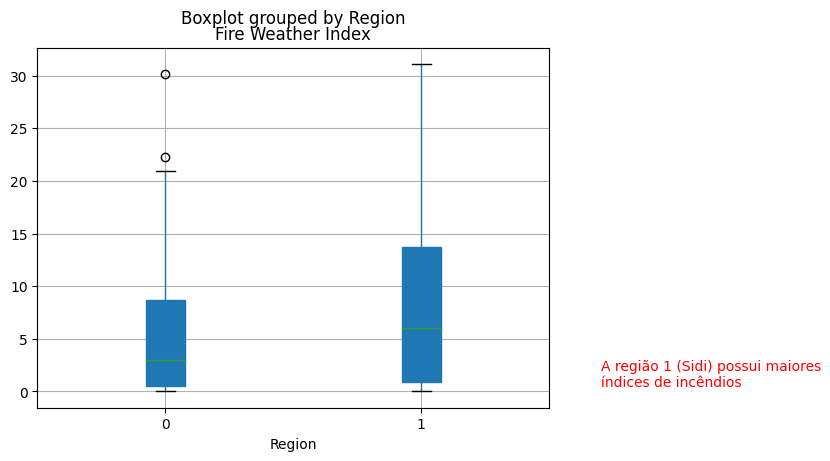

In [26]:
df2.boxplot(column='FWI',by='Region', patch_artist=True)
plt.title('Fire Weather Index')
plt.annotate('A região 1 (Sidi) possui maiores'+'\n'+'índices de incêndios',
            xy=(0.5,0.5), #comentário sobre este ponto (qualquer um, só para aparecer a caixa)
            xytext=(2.7, 0.5), #posição do texto
            fontsize=10,
             color='red')
plt.show()

In [27]:
df2['class_fire'] = df2['class_fire'].str.strip() #havia respostas com espaço
df2.groupby('class_fire')['FWI'].describe()

,count,mean,std,min,25%,50%,75%,max
class_fire,,,,,,,,
fire,137.0,11.732847,6.824427,1.7,6.3,10.50,15.700,31.1
not fire,106.0,0.964151,1.127592,0.0,0.3,0.55,0.975,6.1


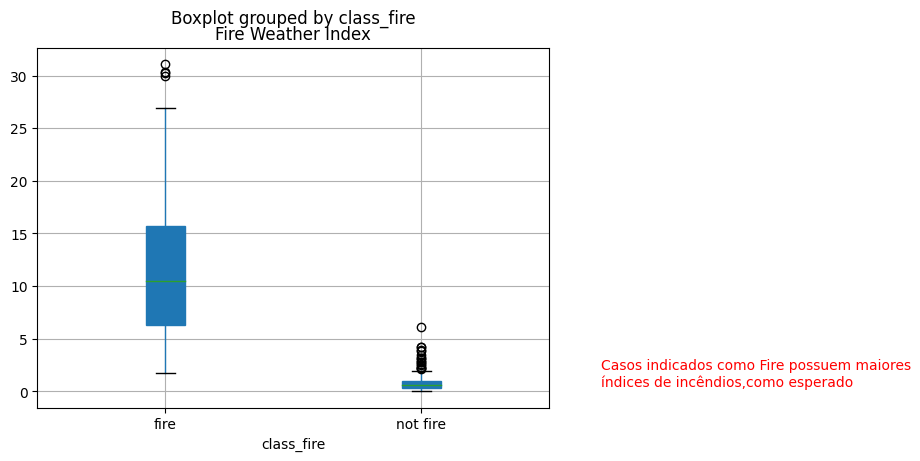

In [28]:
df2.boxplot(column='FWI',by='class_fire', patch_artist=True)
plt.title('Fire Weather Index')
plt.annotate('Casos indicados como Fire possuem maiores'+'\n'+'índices de incêndios,como esperado',
            xy=(0.5,0.5), #comentário sobre este ponto (qualquer um, só para aparecer a caixa)
            xytext=(2.7, 0.5), #posição do texto
            fontsize=10,
             color='red')
plt.show()

<ipython-input-29-638f381d3034>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


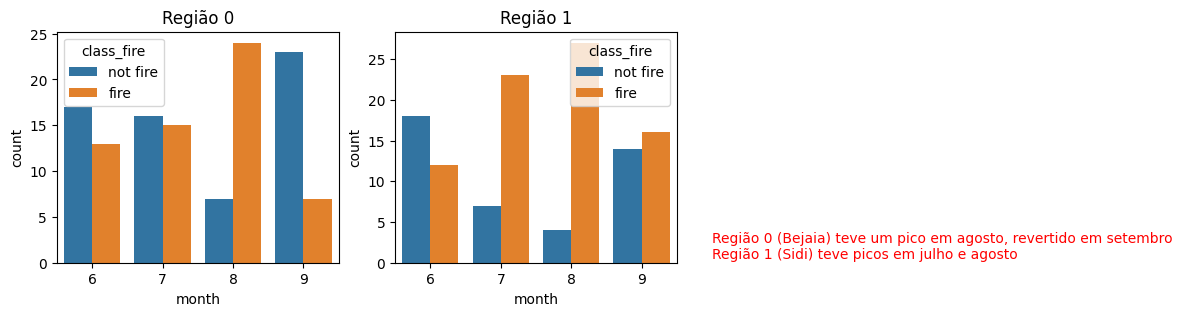

In [29]:
df_reg0 = df2[df2['Region']==0]
df_reg1 = df2[df2['Region']==1]

plt.subplots(figsize=(8,3))

plt.subplot(1, 2, 1)
plt.title('Região 0')
sns.countplot(x='month',hue='class_fire',data=df_reg0)

plt.subplot(1, 2, 2)
plt.title('Região 1')
sns.countplot(x='month',hue='class_fire',data=df_reg1)

plt.annotate('Região 0 (Bejaia) teve um pico em agosto, revertido em setembro'+'\n'+'Região 1 (Sidi) teve picos em julho e agosto',
            xy=(0.5,0.5), #comentário sobre este ponto (qualquer um, só para aparecer a caixa)
            xytext=(4, 0.5), #posição do texto
            fontsize=10,
             color='red')

plt.show()


## Feature Engineer

**Attribute Information:**

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8 FWI Components
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* Drought Code (DC) index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* Buildup Index (BUI) index from the FWI system: 1.1 to 68
* Fire Weather Index (FWI) Index: 0 to 31.1
* Classes: two classes, namely Fire and not Fire

In [30]:
df3 = df2.copy()

In [31]:
df3.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'class_fire', 'Region'],
      dtype='object')

In [32]:
df3 = df3.drop(['index','day','month','year'],axis=1)

In [33]:
dummies_class_fire = pd.get_dummies(df3['class_fire']).astype(int) #só para treinar codificação, porque não faz sentido usar essa variável, dados que é derivada da resposta
df4 = pd.concat([df3,dummies_class_fire],axis=1)

In [34]:
df4 = df4.drop(['class_fire','not fire'],axis=1)

<ipython-input-35-4d2dc7114bd7>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'fire'}>]], dtype=object)

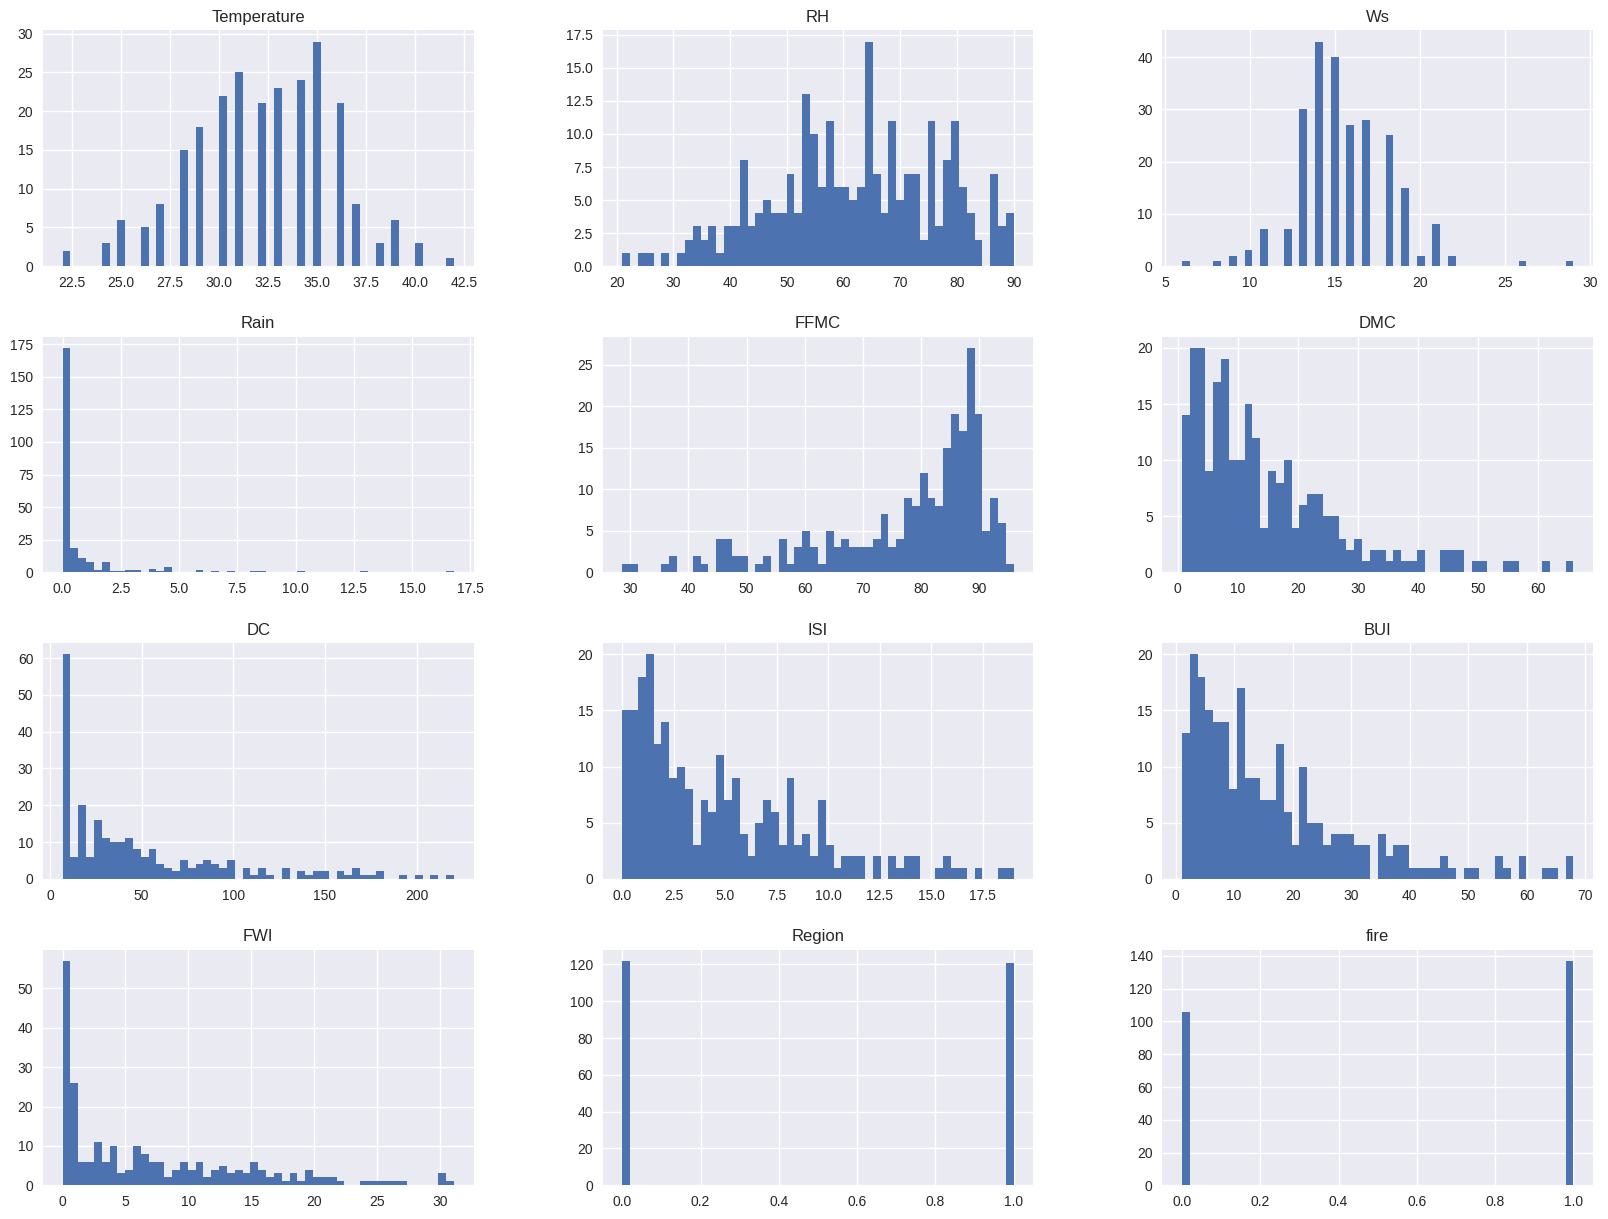

In [35]:
#verifica todas as variáveis
plt.style.use('seaborn')
df4.hist(bins=50,figsize=(20,15))

In [36]:
df4['Region'].value_counts(normalize=1)

,proportion
Region,
0,0.502058
1,0.497942


In [37]:
df4['fire'].value_counts(normalize=1)

,proportion
fire,
1,0.563786
0,0.436214


**Correlation**

<Axes: >

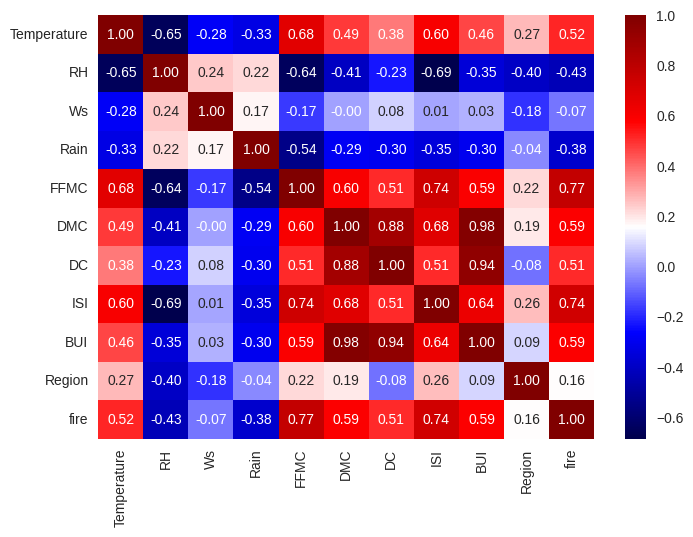

In [38]:
#somente entre features
sns.heatmap(df4.drop(['FWI'],axis=1).corr(), cmap='seismic', annot=True, fmt=".2f")

As variáveis

<Axes: >

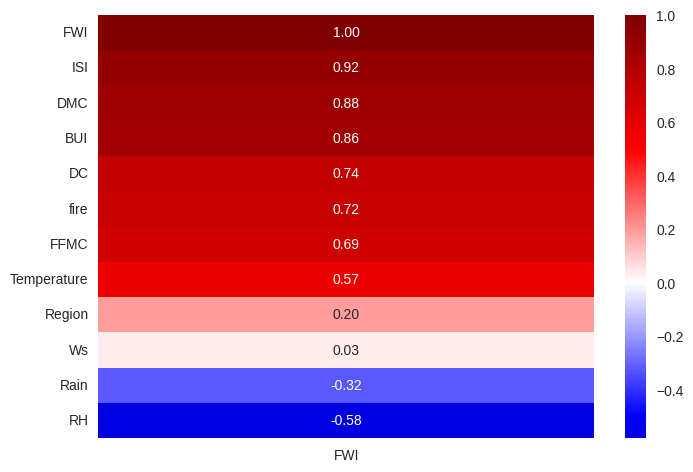

In [39]:
#somente com a resposta
corr_target = df4.corr()[['FWI']].sort_values('FWI',ascending=False)
sns.heatmap(corr_target, cmap='seismic', annot=True, fmt=".2f",center=0)

Considerando a correlação entre as variáveis e a correlação de cada variável com a resposta, seria adequado remover as variáveis BUI e DC.

Também removeremos a variável fire, uma vez que ela pode ser usada para prever FWI.

<Axes: >

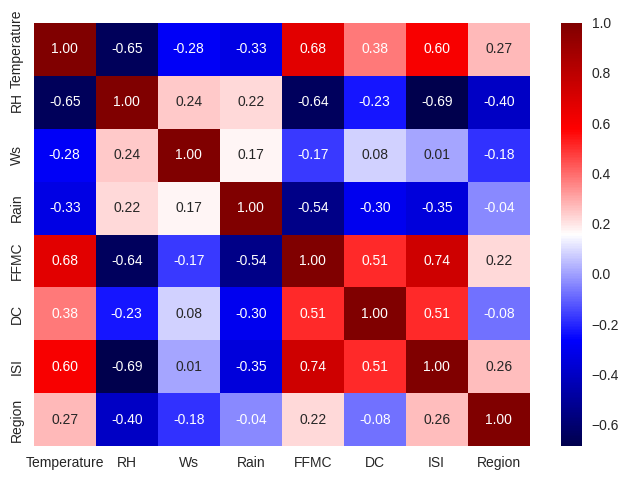

In [40]:
sns.heatmap(df4.drop(['FWI','DMC','BUI','fire'],axis=1).corr(), cmap='seismic', annot=True, fmt=".2f")

## Model training

In [41]:
X = df4[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','Region']]
y = df4[['FWI']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

**Feature Standartization**

In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [44]:
#analisar impact do standarscaler
#plt.boxplot(X_train)
#plt.boxplot(X_train_std)


**Training + Metric evaluation: Regressão linear**

In [45]:
#treinamento do modelo
model = LinearRegression()
model.fit(X_train_std,y_train)

LinearRegression()

In [46]:
#avalia métrica na base de treino e teste
y_pred_train = model.predict(X_train_std)
y_pred_test = model.predict(X_test_std)

In [47]:
mae_train = mean_absolute_error(y_pred_train, y_train)
r2_train = r2_score(y_pred_train, y_train)
rmse_train = mean_squared_error(y_pred_train, y_train)**(1/2)
mae_test = mean_absolute_error(y_pred_test, y_test)
r2_test = r2_score(y_pred_test, y_test)
rmse_test = mean_squared_error(y_pred_test, y_test)**(1/2)

print('MAE treino:',mae_train,' | R² treino: ',r2_train,' | RSME treino: ',rmse_train)
print('MAE teste:',mae_test,' | R² teste: ',r2_test,' | RSME teste: ',rmse_test)

MAE treino: 0.38675135955307566  | R² treino:  0.9938809559430929  | RSME treino:  0.550002719649977
MAE teste: 0.8623962801838837  | R² teste:  0.9414189655264414  | RSME teste:  2.048563419778143


**Training + Metric evaluation: Regressão Lasso**

In [48]:
#treinamento do modelo
model_lasso = Lasso()
model_lasso.fit(X_train_std,y_train)

Lasso()

In [49]:
#avalia métrica na base de treino e teste
y_pred_train_lasso = model_lasso.predict(X_train_std)
y_pred_test_lasso = model_lasso.predict(X_test_std)

In [50]:
mae_train_lasso = mean_absolute_error(y_pred_train_lasso, y_train)
r2_train_lasso = r2_score(y_pred_train_lasso, y_train)
rmse_train_lasso = mean_squared_error(y_pred_train_lasso, y_train)**(1/2)
mae_test_lasso = mean_absolute_error(y_pred_test_lasso, y_test)
r2_test_lasso = r2_score(y_pred_test_lasso, y_test)
rmse_test_lasso = mean_squared_error(y_pred_test_lasso, y_test)**(1/2)

print('MAE treino:',mae_train_lasso,' | R² treino: ',r2_train_lasso,' | RSME treino: ',rmse_train_lasso)
print('MAE teste:',mae_test_lasso,' | R² teste: ',r2_test_lasso,' | RSME teste: ',rmse_test_lasso)

MAE treino: 1.0109355264933448  | R² treino:  0.9471469104990304  | RSME treino:  1.36152857354067
MAE teste: 1.4263262513915285  | R² teste:  0.9061347114128445  | RSME teste:  2.1487411042292464


**Training + Metric evaluation: Regressão Ridge**

In [51]:
#treinamento do modelo
model_ridge = Ridge()
model_ridge.fit(X_train_std,y_train)

Ridge()

In [52]:
#avalia métrica na base de treino e teste
y_pred_train_ridge = model_ridge.predict(X_train_std)
y_pred_test_ridge = model_ridge.predict(X_test_std)

In [53]:
mae_train_ridge = mean_absolute_error(y_pred_train_ridge, y_train)
r2_train_ridge = r2_score(y_pred_train_ridge, y_train)
rmse_train_ridge = mean_squared_error(y_pred_train_ridge, y_train)**(1/2)
mae_test_ridge = mean_absolute_error(y_pred_test_ridge, y_test)
r2_test_ridge = r2_score(y_pred_test_ridge, y_test)
rmse_test_ridge = mean_squared_error(y_pred_test_ridge, y_test)**(1/2)

print('MAE treino:',mae_train_ridge,' | R² treino: ',r2_train_ridge,' | RSME treino: ',rmse_train_ridge)
print('MAE teste:',mae_test_ridge,' | R² teste: ',r2_test_ridge,' | RSME teste: ',rmse_test_ridge)

MAE treino: 0.3984874046307584  | R² treino:  0.9934777727208134  | RSME treino:  0.5655390953188069
MAE teste: 0.8526229561177339  | R² teste:  0.9424781380616929  | RSME teste:  2.0211682268365943


**Training + Metric evaluation: Regressão ElasticNet**

In [54]:
#treinamento do modelo
model_elastic = ElasticNet()
model_elastic.fit(X_train_std,y_train)

ElasticNet()

In [55]:
#avalia métrica na base de treino e teste
y_pred_train_elastic = model_elastic.predict(X_train_std)
y_pred_test_elastic = model_elastic.predict(X_test_std)

In [56]:
mae_train_elastic = mean_absolute_error(y_pred_train_elastic, y_train)
r2_train_elastic = r2_score(y_pred_train_elastic, y_train)
rmse_train_elastic = mean_squared_error(y_pred_train_elastic, y_train)**(1/2)
mae_test_elastic = mean_absolute_error(y_pred_test_elastic, y_test)
r2_test_elastic = r2_score(y_pred_test_elastic, y_test)
rmse_test_elastic = mean_squared_error(y_pred_test_elastic, y_test)**(1/2)

print('MAE treino:',mae_train_elastic,' | R² treino: ',r2_train_elastic,' | RSME treino: ',rmse_train_elastic)
print('MAE teste:',mae_test_elastic,' | R² teste: ',r2_test_elastic,' | RSME teste: ',rmse_test_elastic)

MAE treino: 1.5292148968788617  | R² treino:  0.8688767569684562  | RSME treino:  1.999247938998295
MAE teste: 2.1241474675629326  | R² teste:  0.8052659713043265  | RSME teste:  2.760631620676116


**Resumo comparativo**

In [57]:
#Resumo
print('__________Regressão Linear')
print('MAE treino:',mae_train,' | R² treino: ',r2_train,' | RSME treino: ',rmse_train)
print('MAE teste:',mae_test,' | R² teste: ',r2_test,' | RSME teste: ',rmse_test)
print('__________Regressão Lasso')
print('MAE treino:',mae_train_lasso,' | R² treino: ',r2_train_lasso,' | RSME treino: ',rmse_train_lasso)
print('MAE teste:',mae_test_lasso,' | R² teste: ',r2_test_lasso,' | RSME teste: ',rmse_test_lasso)
print('__________Regressão Ridge')
print('MAE treino:',mae_train_ridge,' | R² treino: ',r2_train_ridge,' | RSME treino: ',rmse_train_ridge)
print('MAE teste:',mae_test_ridge,' | R² teste: ',r2_test_ridge,' | RSME teste: ',rmse_test_ridge)
print('__________Regressão Elastic Net')
print('MAE treino:',mae_train_elastic,' | R² treino: ',r2_train_elastic,' | RSME treino: ',rmse_train_elastic)
print('MAE teste:',mae_test_elastic,' | R² teste: ',r2_test_elastic,' | RSME teste: ',rmse_test_elastic)

__________Regressão Linear
MAE treino: 0.38675135955307566  | R² treino:  0.9938809559430929  | RSME treino:  0.550002719649977
MAE teste: 0.8623962801838837  | R² teste:  0.9414189655264414  | RSME teste:  2.048563419778143
__________Regressão Lasso
MAE treino: 1.0109355264933448  | R² treino:  0.9471469104990304  | RSME treino:  1.36152857354067
MAE teste: 1.4263262513915285  | R² teste:  0.9061347114128445  | RSME teste:  2.1487411042292464
__________Regressão Ridge
MAE treino: 0.3984874046307584  | R² treino:  0.9934777727208134  | RSME treino:  0.5655390953188069
MAE teste: 0.8526229561177339  | R² teste:  0.9424781380616929  | RSME teste:  2.0211682268365943
__________Regressão Elastic Net
MAE treino: 1.5292148968788617  | R² treino:  0.8688767569684562  | RSME treino:  1.999247938998295
MAE teste: 2.1241474675629326  | R² teste:  0.8052659713043265  | RSME teste:  2.760631620676116


*As regressões Linear e Ridge apresentaram resultados semelhantes, porém com indicação de overfitting.*



## Add Cross Validation

**Training + Metric evaluation: Regressão Ridge com Cross Validation**

In [80]:
#treinamento do modelo
model_ridge_cv = RidgeCV(cv=10)
model_ridge_cv.fit(X_train_std,y_train)

RidgeCV(cv=10)

In [81]:
#avalia métrica na base de treino e teste
y_pred_train_ridge_cv = model_ridge_cv.predict(X_train_std)
y_pred_test_ridge_cv = model_ridge_cv.predict(X_test_std)

In [82]:
mae_train_ridge_cv = mean_absolute_error(y_pred_train_ridge_cv, y_train)
r2_train_ridge_cv = r2_score(y_pred_train_ridge_cv, y_train)
rmse_train_ridge_cv = mean_squared_error(y_pred_train_ridge_cv, y_train)**(1/2)
mae_test_ridge_cv = mean_absolute_error(y_pred_test_ridge_cv, y_test)
r2_test_ridge_cv = r2_score(y_pred_test_ridge_cv, y_test)
rmse_test_ridge_cv = mean_squared_error(y_pred_test_ridge_cv, y_test)**(1/2)

print('MAE treino:',mae_train_ridge_cv,' | R² treino: ',r2_train_ridge_cv,' | RSME treino: ',rmse_train_ridge_cv)
print('MAE teste:',mae_test_ridge_cv,' | R² teste: ',r2_test_ridge_cv,' | RSME teste: ',rmse_test_ridge_cv)

MAE treino: 0.3882192530506164  | R² treino:  0.9938644937477382  | RSME treino:  0.5504834543257628
MAE teste: 0.8597441606071522  | R² teste:  0.9415425087715963  | RSME teste:  2.045740148542414


In [83]:
print('__________Regressão Ridge')
print('MAE treino:',mae_train_ridge,' | R² treino: ',r2_train_ridge,' | RSME treino: ',rmse_train_ridge)
print('MAE teste:',mae_test_ridge,' | R² teste: ',r2_test_ridge,' | RSME teste: ',rmse_test_ridge)

__________Regressão Ridge
MAE treino: 0.3984874046307584  | R² treino:  0.9934777727208134  | RSME treino:  0.5655390953188069
MAE teste: 0.8526229561177339  | R² teste:  0.9424781380616929  | RSME teste:  2.0211682268365943


O cross validation adicionou pouca diferença.